# Workshop: Analyzing bank marketing data with scikit-learn

Task: Your client has given you a dataset and has asked you to build a model to:
1. predict whether a given customer is likely to purchase a bank term deposit.
2. analyze the factors that make customer more likely (or less likely) to purchase a bank term deposit

Build this model by going through the process of tackling classification problems:
1. Load and explore data
2. Preprocess / clean data
3. Train the model
4. Evaluate the model
5. Use the model (for prediction and interpretation)

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50
%precision 3

u'%.3f'

## 1. Load and explore the data

In [2]:
df = pd.read_csv('./data/bank-marketing-data/bank-additional-one-hot-encoded.csv')

# balanced data. uncomment the line below for the second part of your workshop
# df = pd.read_csv('./data/bank-marketing-data/bank-additional-balanced-dataset.csv', index_col=0)

Based on the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing), we know that the data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). For more info on the dataset, please see the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

### Data exploration

In [3]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,0.163713,0.024619,0.008012,0.111974,0.605225,0.280859,...,0.523842,0.824269,0.024036,0.151695,0.634748,0.365252,0.063902,0.149995,0.004419,0.174177,0.129115,0.013256,0.334296,0.099568,0.017432,0.013839,0.190031,0.206711,0.209357,0.196416,0.197485,0.103234,0.863431,0.033335,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,0.370019,0.154962,0.089152,0.315339,0.488808,0.449424,...,0.499437,0.380596,0.153163,0.358729,0.481507,0.481507,0.244581,0.357071,0.066328,0.379266,0.335332,0.114372,0.471750,0.299427,0.130877,0.116824,0.392330,0.404951,0.406855,0.397292,0.398106,0.304268,0.343396,0.179512,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,

## 3. Prepare / clean the data for modeling

### Convert pandas dataframe into 2 matrices for the model's consumption

In [16]:
X = df.iloc[:, df.columns != 'y'].values
y = df.iloc[:, df.columns == 'y'].values.ravel()

In [24]:
X.shape
y.shape

(41188,)

### Split data into train and test set

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## 4. Train the model!

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 5. Evaluate the model

### Evaluation method 1: `.score(X, y)`

In [33]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("training set score: %f" % train_score)
print("test set score:     %f" % test_score)

training set score: 0.908906
test set score:     0.912013


In [34]:
X_train.shape

(30891, 63)

In [38]:
print(df['y'].value_counts())
print(36548.0/(36548 + 4640))

0    36548
1     4640
Name: y, dtype: int64
0.887345828882


### Evaluation method 2: `.confusion_matrix(expected, predicted)`

In [39]:
from sklearn import metrics

In [37]:
expected = y
predicted = model.predict(X)

confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("CONFUSION MATRIX")
print(confusion_matrix)

CONFUSION MATRIX
[[35613   935]
 [ 2785  1855]]


Confusion matrices are in the following format:
    
```
[[true_positive , false_positive]
 [false_negative, true_negative]]
```

### Evaluation method 3: `.classification_report(expected, predicted)`

In [40]:
report = metrics.classification_report(expected, predicted)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.93      0.97      0.95     36548
          1       0.66      0.40      0.50      4640

avg / total       0.90      0.91      0.90     41188



## 6. Using the model to predict outcomes based on fresh/unseen data

Load new data from './data/bank-marketing-data/bank-unseen-data.csv'

In [41]:
df_new = pd.read_csv('./data/bank-marketing-data/bank-unseen-data.csv')

In [42]:
df_new.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,31,456,2,999,0,-1.1,94.767,-50.8,1.044,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,61,508,4,999,0,-1.1,94.767,-50.8,1.044,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
2,31,260,1,999,0,-1.1,94.767,-50.8,1.041,4963.6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,58,193,1,999,0,-1.1,94.767,-50.8,1.041,4963.6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,41,597,2,3,2,-1.1,94.767,-50.8,1.041,4963.6,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1


In [43]:
X_new = df_new.as_matrix()

In [44]:
print(model.predict_proba(X_new))
print(model.predict(X_new))

[[ 0.474  0.526]
 [ 0.47   0.53 ]
 [ 0.656  0.344]
 [ 0.726  0.274]
 [ 0.106  0.894]
 [ 0.501  0.499]
 [ 0.698  0.302]
 [ 0.743  0.257]
 [ 0.474  0.526]
 [ 0.545  0.455]
 [ 0.581  0.419]
 [ 0.774  0.226]]
[1 1 0 0 1 0 0 0 1 0 0 0]


# Bonus: interpreting our model

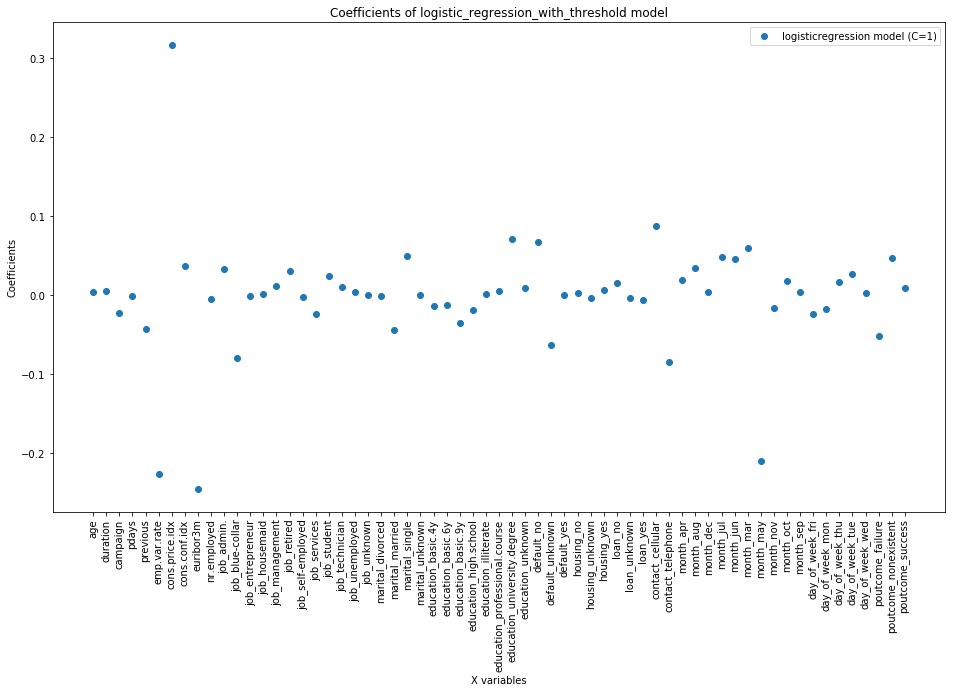

In [46]:
plt.figure(figsize=(16,9))

plt.plot(model.coef_.T, 'o', label="logisticregression model (C=1)")
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.title("Coefficients of logistic_regression_with_threshold model")
plt.ylabel("Coefficients")
plt.xlabel("X variables")
plt.legend()

In [47]:
np.exp(model.coef_)

array([[ 1.003,  1.004,  0.977,  0.998,  0.958,  0.797,  1.372,  1.037,
         0.782,  0.994,  1.033,  0.923,  0.998,  1.002,  1.011,  1.03 ,
         0.998,  0.977,  1.024,  1.01 ,  1.004,  0.999,  0.998,  0.957,
         1.05 ,  1.   ,  0.986,  0.987,  0.966,  0.982,  1.001,  1.005,
         1.073,  1.008,  1.069,  0.938,  1.   ,  1.002,  0.996,  1.006,
         1.015,  0.996,  0.993,  1.092,  0.919,  1.019,  1.034,  1.004,
         1.049,  1.046,  1.061,  0.81 ,  0.984,  1.018,  1.003,  0.976,
         0.982,  1.016,  1.026,  1.003,  0.95 ,  1.047,  1.008]])

In [48]:
# Before we can interpret coefficients as probabilities, we need to do a little math to calculate the odds ratio
# and the probability
logodds = model.intercept_ + model.coef_[0] * 2
odds = np.exp(logodds)
probabilities = odds/(1 + odds)
probabilities

array([ 0.502,  0.503,  0.489,  0.5  ,  0.479,  0.389,  0.654,  0.519,
        0.38 ,  0.498,  0.517,  0.461,  0.5  ,  0.502,  0.506,  0.516,
        0.5  ,  0.489,  0.513,  0.506,  0.503,  0.5  ,  0.5  ,  0.479,
        0.525,  0.501,  0.494,  0.494,  0.483,  0.491,  0.501,  0.503,
        0.536,  0.505,  0.534,  0.469,  0.501,  0.502,  0.499,  0.504,
        0.508,  0.499,  0.497,  0.545,  0.459,  0.51 ,  0.518,  0.503,
        0.525,  0.523,  0.531,  0.397,  0.493,  0.51 ,  0.502,  0.489,
        0.492,  0.509,  0.514,  0.502,  0.475,  0.524,  0.505])

In [37]:
number_of_x_vars = len(df.columns) - 1

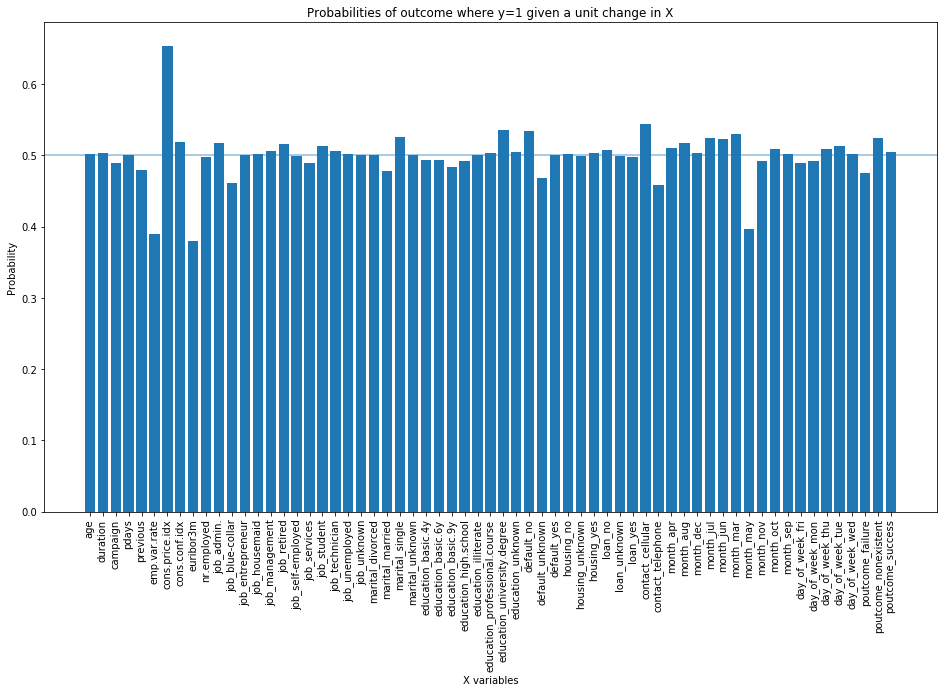

In [38]:
plt.figure(figsize=(16,9))

plt.bar(range(0, number_of_x_vars), probabilities)
plt.title("Probabilities of outcome where y=1 given a unit change in X")
plt.xlabel("X variables")
plt.ylabel("Probability")
plt.axhline(y=0.5, hold=None, alpha=0.5)
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.legend()

#### How to interpret the chart 

We can interpret the chart above as such: Given a unit increase in X, the user is predicted to be \__% more likely to purchase a bank term deposit (i.e. y=1)

For example, given a unit increase in employment variation rate (the first positive blip in the chart), the user is predicted to be 16% more likely to purchase a bank term deposit

#### Based on this chart, we can observe the following: 
    
Attributes that have a positive effect on the outcome:
- contact_cellular
- month_august
- month_oct
- day_of_week_fri

Attributes that have a negative effect on the outcome:
- emp.var.rate
- cons.price.index
- cons.conf.index
- euribor3m
- education_basic.4y
- contact_telephone
- month_may